## F - Training hyper parameters

Authors: Noemi Anau Montel, James Alvey, Christoph Weniger

Last update: 15 September 2023

**Purpose**: Making explicit all hyperparameters that govern the training and result.

**Key take-away messages**: All hyper-parameters relevant for training are easily accessible for the user. A good understanding of how these parameters affect inference results is important in order to produce high-fidelity results.

### Code

In [1]:
import numpy as np
import pylab as plt
import swyft
import torch
import pytorch_lightning as pl
DEVICE = 'gpu' if torch.cuda.is_available() else 'cpu'

In [2]:
torch.manual_seed(0)
np.random.seed(0)

We consider the simple problem of measuring the mean of a Gaussian that we started with.

In [3]:
def get_samples(N):
    z = np.random.rand(N, 1)*2-1  # Uniform prior over [-1, 1]
    x = z + np.random.randn(N, 1)*0.2
    samples = swyft.Samples(x = x, z = z)
    return samples

Let's now see how to pass network hyperparameters to `swyft.SwyftModule`. Since Swyft builds on PyTorch, we can use PyTorch functionalities for optimization. In the example below, we use the standard Adam algorithm to perform optimization steps, starting with a given learning rate `lr`, that can be passed through `swyft.SwyftModule`.

In [4]:
class Network(swyft.SwyftModule):
    def __init__(self, lr = 1e-3):
        super().__init__()
        self.learning_rate = lr
        self.logratios = swyft.LogRatioEstimator_1dim(num_features = 1, num_params = 1, varnames = 'z', hidden_features = 128)

    def forward(self, A, B):
        logratios = self.logratios(A['x'], B['z'])
        return logratios

In [5]:
def run(N = 3000, shuffle = False, lr = 1e-2, batch_size = 32):
    torch.manual_seed(0)
    np.random.seed(0)
    test_samples = get_samples(1000)
    samples = get_samples(N)
    dm = swyft.SwyftDataModule(samples, batch_size = batch_size, shuffle = shuffle)
    trainer = swyft.SwyftTrainer(accelerator = DEVICE, precision = 64)
    network = Network()
    trainer.fit(network, dm)
    test_result = trainer.test(network, test_samples.get_dataloader(batch_size = 64))
    return test_result, network, trainer

Notice the printed learning rate decay.

In [6]:
test_result, network, trainer = run(N = 2000, shuffle = False, lr = 1e-2, batch_size = 32)

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/cweniger/opt/anaconda3/envs/native2/lib/python3.9/site-packages/pytorch_lightning/trainer/setup.py:200: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(
/Users/cweniger/opt/anaconda3/envs/native2/lib/python3.9/site-packages/pytorch_lightning/loops/utilities.py:94: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  rank_zero_warn(
The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: ModelCheckpoint

  | Name      | Type                   | Params
-----------------------------------------------------
0 | logratios | LogRatioEstimator_1dim | 67.6 K
------------------------------------------------

Sanity Checking: 0it [00:00, ?it/s]

/Users/cweniger/opt/anaconda3/envs/native2/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/Users/cweniger/opt/anaconda3/envs/native2/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: EarlyStopping, ModelCheckpoint


Reloading best model: /Users/cweniger/Documents/swyft/notebooks/lightning_logs/version_48/checkpoints/epoch=5-step=300.ckpt


/Users/cweniger/opt/anaconda3/envs/native2/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss           -0.5856146229232524
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [8]:
test_result, network, trainer = run(N = 2000, shuffle = True, lr = 1e-4, batch_size = 32)

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: ModelCheckpoint

  | Name      | Type                   | Params
-----------------------------------------------------
0 | logratios | LogRatioEstimator_1dim | 67.6 K
-----------------------------------------------------
67.6 K    Trainable params
0         Non-trainable params
67.6 K    Total params
0.541     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: EarlyStopping, ModelCheckpoint


Reloading best model: /Users/cweniger/Documents/swyft/notebooks/lightning_logs/version_50/checkpoints/epoch=3-step=200.ckpt


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss           -0.5863014549671752
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: EarlyStopping, ModelCheckpoint


Predicting: 50it [00:00, ?it/s]

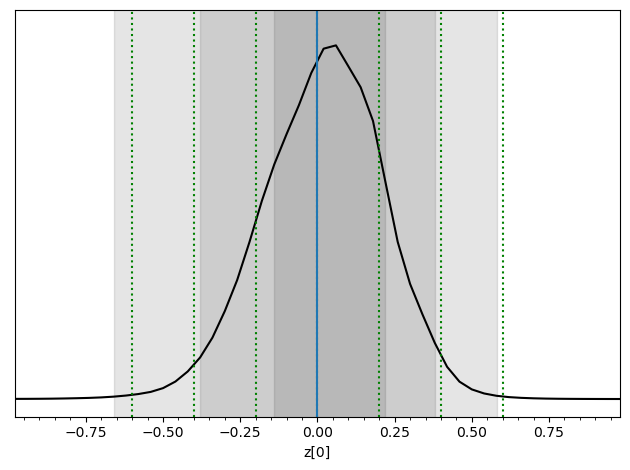

In [12]:
x0 = 0.0
obs = swyft.Sample(x = np.array([x0]))
prior_samples = swyft.Samples(z = np.random.rand(10_000, 1)*2-1)
predictions = trainer.infer(network, obs, prior_samples)
swyft.plot_posterior(predictions, "z[0]", bins = 50, smooth = 1)
for offset in [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6]:
    plt.axvline(x0+offset, color='g', ls = ':')
plt.axvline(x0);

### Exercises

1. Turn off the learning rate decay, and see how the posteriors look starting with different learning rates values, e.g. [1e-2, 1e-4, 1e-6]. How is the learning process affected by the learning rate?

In [10]:
# Your results goes here

2. See what happens changing the early stopping patience.

In [11]:
# Your results goes here